In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("..")  # Go up one level to the UROP directory
print(os.getcwd())

/home/massimiliano/Projects/UROP


In [3]:
import torch
from utils import SensorDataset, LazyWindowedMultiSensorDataset
from torch.utils.data import DataLoader
import yaml

import librosa
import matplotlib.pyplot as plt
%matplotlib inline

with open("config.yaml") as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [4]:
# Initialize Dataset
dataset = LazyWindowedMultiSensorDataset(root_dir="datasets/BrushlessMotor", split="train", metadata_file="attributes_normal_source_train.csv")
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2)

print(f"Number of samples in dataset: {len(dataset)}")
print(f"Number of batches in dataloader: {len(dataloader)}")

Number of samples in dataset: 130089
Number of batches in dataloader: 2033


In [5]:
for batch_idx, data in enumerate(dataloader):
    mic, acc, gyro, labels = data
    print(f"Mic shape: {mic.shape}")
    print(f"Acc shape: {acc.shape}")
    print(f"Gyro shape: {gyro.shape}")
    for key, value in labels.items():
        print(f"Length of {key}: {len(value)}")
    if batch_idx == 3:
        break
    else:
        print()

Mic shape: torch.Size([64, 1600, 1])
Acc shape: torch.Size([64, 670, 3])
Gyro shape: torch.Size([64, 670, 3])
Length of segment_id: 64
Length of split_label: 64
Length of anomaly_label: 64
Length of domain_shift_op: 64
Length of domain_shift_env: 64

Mic shape: torch.Size([64, 1600, 1])
Acc shape: torch.Size([64, 670, 3])
Gyro shape: torch.Size([64, 670, 3])
Length of segment_id: 64
Length of split_label: 64
Length of anomaly_label: 64
Length of domain_shift_op: 64
Length of domain_shift_env: 64

Mic shape: torch.Size([64, 1600, 1])
Acc shape: torch.Size([64, 670, 3])
Gyro shape: torch.Size([64, 670, 3])
Length of segment_id: 64
Length of split_label: 64
Length of anomaly_label: 64
Length of domain_shift_op: 64
Length of domain_shift_env: 64

Mic shape: torch.Size([64, 1600, 1])
Acc shape: torch.Size([64, 670, 3])
Gyro shape: torch.Size([64, 670, 3])
Length of segment_id: 64
Length of split_label: 64
Length of anomaly_label: 64
Length of domain_shift_op: 64
Length of domain_shift_env: 

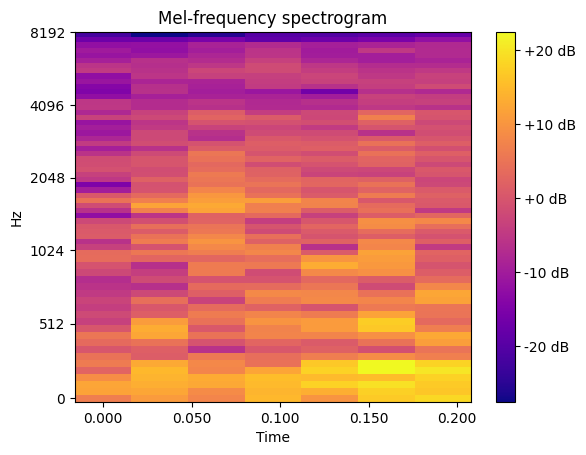

In [7]:
random_index = torch.randint(0, 64, (1,)).item()
mel_spectrogram = librosa.feature.melspectrogram(y=mic[random_index, :, 0].numpy(), sr=16000, n_fft=512, hop_length=256, n_mels=64)
mel_log_spectrogram = librosa.power_to_db(mel_spectrogram)

plt.figure()
librosa.display.specshow(mel_log_spectrogram, x_axis='time', y_axis='mel', sr=16000, cmap='plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()